# 2nd Oct

In [1]:
import tweepy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from tweepy.auth import OAuthHandler

In [2]:
path = r'/home/edmundotome/Documents/Github Projects/LogAPItwitter.csv'
log = pd.read_csv(path)

In [3]:
consumerKey = log['API Key'][0]
consumerSecret = log['API Key Secret'][0]

accessToken = log['Access Token'][0]
accessTokenSecret = log['Access Token Secret'][0]

In [4]:
auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
#gather 1000 tweets about Bitcoin and filter out any retweets 'RT'
search_term = '#bitcoin -filter:retweets'

#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-10-02', tweet_mode='extended').items(1000)

#store tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [6]:
#create a dataframe to store the tweets with a column called 'tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#show the first 5 rows of data
df.head(10)

,Tweets
0,#Bitcoin attacking the H1 EMA30 again.\nIt has...
1,@Mononoke_Inu Today 17th marks the wolf's moon...
2,If we fail to hold 42k than 40k is the next st...
3,Jordan Peterson got orange-pilled hard and saw...
4,#Bitcoin attacking the H1 EMA30 again.\nIt has...
5,#Bitcoin bro people actually die bro yoir so f...
6,A promising project. Hopefully this project w...
7,#Bitcoin attacking the H1 EMA30 again.\nIt has...
8,#Bitcoin attacking the H1 EMA30 again.\nIt has...
9,#Bitcoin attacking the H1 EMA30 again.\nIt has...


In [7]:
#create a function to clean the tweets 
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt)
  twt = re.sub('#BTC', 'Bitcoin', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with a '#'
  twt = re.sub('\\n', '', twt) #removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #removes any hyperlinks
  return twt

In [8]:
#clean the tweets
df['Cleaned Tweets'] = df['Tweets'].apply(cleanTwt)
#show the dataset
df.head()

,Tweets,Cleaned Tweets
0,#Bitcoin attacking the H1 EMA30 again.\nIt has...,Bitcoin attacking the H1 EMA30 again.It has be...
1,@Mononoke_Inu Today 17th marks the wolf's moon...,@Mononoke_Inu Today 17th marks the wolf's moon...
2,If we fail to hold 42k than 40k is the next st...,If we fail to hold 42k than 40k is the next st...
3,Jordan Peterson got orange-pilled hard and saw...,Jordan Peterson got orange-pilled hard and saw...
4,#Bitcoin attacking the H1 EMA30 again.\nIt has...,Bitcoin attacking the H1 EMA30 again.It has be...


In [9]:
#create a function to get subjetivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#create a function to get polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#create two new columns called 'Subjetivity' and 'Polarity'
df['Subjetivity'] = df['Cleaned Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Cleaned Tweets'].apply(getPolarity)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity
0,#Bitcoin attacking the H1 EMA30 again.\nIt has...,Bitcoin attacking the H1 EMA30 again.It has be...,0.393750,-0.156250
1,@Mononoke_Inu Today 17th marks the wolf's moon...,@Mononoke_Inu Today 17th marks the wolf's moon...,0.700000,0.150000
2,If we fail to hold 42k than 40k is the next st...,If we fail to hold 42k than 40k is the next st...,0.150000,-0.250000
3,Jordan Peterson got orange-pilled hard and saw...,Jordan Peterson got orange-pilled hard and saw...,0.541667,-0.291667
4,#Bitcoin attacking the H1 EMA30 again.\nIt has...,Bitcoin attacking the H1 EMA30 again.It has be...,0.393750,-0.156250
5,#Bitcoin bro people actually die bro yoir so f...,Bitcoin bro people actually die bro yoir so fa...,0.775000,-0.131250
6,A promising project. Hopefully this project w...,A promising project. Hopefully this project w...,0.250000,0.250000
7,#Bitcoin attacking the H1 EMA30 again.\nIt has...,Bitcoin attacking the H1 EMA30 again.It has be...,0.393750,-0.156250
8,#Bitcoin attacking the H1 EMA30 again.\nIt has...,Bitcoin attacking the H1 EMA30 again.It has be...,0.393750,-0.156250
9,#Bitcoin attacking the H1 EMA30 again.\nIt has...,Bitcoin attacking the H1 EMA30 again.It has be...,0.393750,-0.156250


In [10]:
#create a function to get sentiment text 
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [11]:
#create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity,Sentiment
0,#Bitcoin attacking the H1 EMA30 again.\nIt has...,Bitcoin attacking the H1 EMA30 again.It has be...,0.393750,-0.156250,Negative
1,@Mononoke_Inu Today 17th marks the wolf's moon...,@Mononoke_Inu Today 17th marks the wolf's moon...,0.700000,0.150000,Positive
2,If we fail to hold 42k than 40k is the next st...,If we fail to hold 42k than 40k is the next st...,0.150000,-0.250000,Negative
3,Jordan Peterson got orange-pilled hard and saw...,Jordan Peterson got orange-pilled hard and saw...,0.541667,-0.291667,Negative
4,#Bitcoin attacking the H1 EMA30 again.\nIt has...,Bitcoin attacking the H1 EMA30 again.It has be...,0.393750,-0.156250,Negative
5,#Bitcoin bro people actually die bro yoir so f...,Bitcoin bro people actually die bro yoir so fa...,0.775000,-0.131250,Negative
6,A promising project. Hopefully this project w...,A promising project. Hopefully this project w...,0.250000,0.250000,Positive
7,#Bitcoin attacking the H1 EMA30 again.\nIt has...,Bitcoin attacking the H1 EMA30 again.It has be...,0.393750,-0.156250,Negative
8,#Bitcoin attacking the H1 EMA30 again.\nIt has...,Bitcoin attacking the H1 EMA30 again.It has be...,0.393750,-0.156250,Negative
9,#Bitcoin attacking the H1 EMA30 again.\nIt has...,Bitcoin attacking the H1 EMA30 again.It has be...,0.393750,-0.156250,Negative


/home/edmundotome/anaconda3/envs/Signal-Processing/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


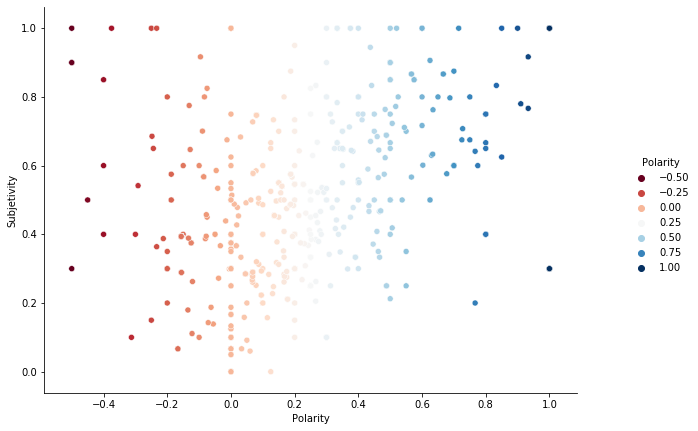

In [12]:
ax = sns.relplot(df['Polarity'], df['Subjetivity'], hue = df['Polarity'], palette='RdBu')
ax.fig.set_size_inches(10,6)

norm = plt.Normalize(df['Polarity'].min(), df['Polarity'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

plt.show()

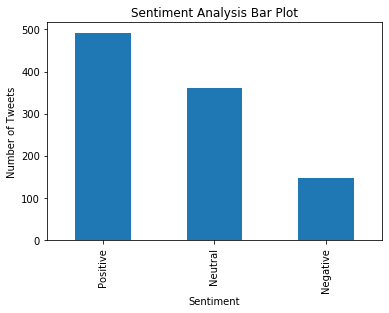

In [13]:
#create a barchar to show the count of positive, neutral and negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [14]:
df['Sentiment'].value_counts()

Positive    492
Neutral     360
Negative    148
Name: Sentiment, dtype: int64

In [15]:
val_count = list(df['Sentiment'].value_counts())
val_count

[492, 360, 148]

In [16]:
lst_df = list(df['Sentiment'].value_counts())
lst_df

[492, 360, 148]

In [17]:
dfs = pd.read_csv("r_sentiments.csv")
  
# updating the column value/data
dfs.loc[4, 'Sentiment'] = 'day 5'
dfs.loc[4, 'Positive'] = lst_df[0]
dfs.loc[4, 'Neutral'] = lst_df[1]
dfs.loc[4, 'Negative'] = lst_df[2]
  
# writing into the file
dfs.to_csv("r_sentiments.csv", index=False)
  
print(dfs)

  Sentiment  Positive  Neutral  Negative
0     day 1     494.0    372.0     134.0
1     day 2     494.0    388.0     118.0
2     day 3     487.0    416.0      97.0
3     day 4     495.0    422.0      83.0
4     day 5     492.0    360.0     148.0
